In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(400, 700, 301)
R05 = pd.read_csv('./spectrum/TPK/R_5_B.csv')['SCAN'][20:-80].values/100
R15 = pd.read_csv('./spectrum/TPK/R_15_B.csv')['SCAN'][20:-80].values/100
R30 = pd.read_csv('./spectrum/TPK/R_30_B.csv')['SCAN'][20:-80].values/100
R45 = pd.read_csv('./spectrum/TPK/R_45_B.csv')['SCAN'][20:-80].values/100

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
A1 = ml.open_material('Acrylic', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')

In [3]:
def hypo(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

fom = lambda th: np.mean(abs(hypo(th, wl, 5)-R05))

In [4]:
sol = differential_evolution(
    fom, [
        (1100, 1300), # top O.C.
        (19.25,29.25), # top IM 2
        (12.81,22.81), # top IM 1
        (41.64,51.64), # pattern ITO
        (11.11,21.11), # bottom 2
        (19.59,29.59), # bottom 1
        (1.69, 2),
        (1.44, 1.58),
        (1.44, 1.59),
        (1.78, 2),
        (-0.02, -0.2),
        (-0.02, -0.2),
        (-0.02, -0.2),
        (-0.02, -0.2),
    ]
)
print(sol.x)
print(sol.message)

[ 1.10021536e+03  2.89014741e+01  1.93152137e+01  4.24651043e+01
  1.36374102e+01  2.39733744e+01  1.96581399e+00  1.57639181e+00
  1.56757076e+00  1.87411888e+00 -1.93368438e-01 -6.34992028e-02
 -2.47537791e-02 -2.12780471e-02]
Optimization terminated successfully.


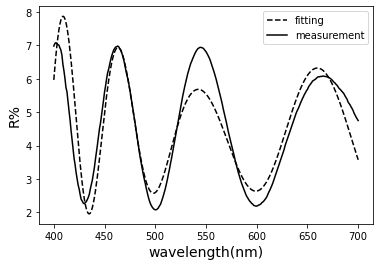

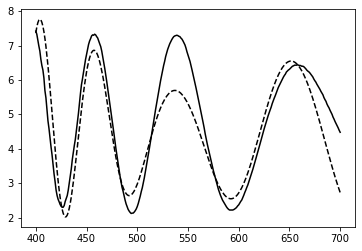

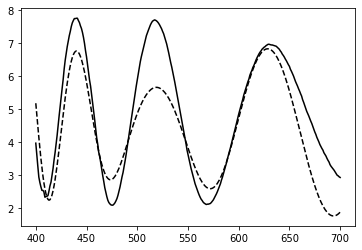

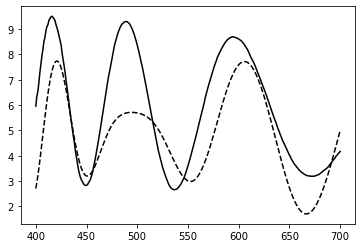

In [5]:
k = [ 1.10207914e+03,  28.6,  2.01500752e+01,  4.21692886e+01,
  1.23630060e+01,  2.78475430e+01,  1.97,  1.55053523e+00,
  1.58343023e+00,  1.82065632e+00, -1.98293788e-01, -4.60394608e-02,
 -3.50813329e-02, -2.07510913e-02]

plt.plot(wl, 100*hypo(k, wl, 5), '--k',label = 'fitting')
plt.plot(wl, 100*R05, '-k',label = 'measurement')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('TPK.png')
plt.show()
plt.plot(wl, 100*hypo(sol.x, wl, 15), '--k',label = 'fitting')
plt.plot(wl, 100*R15, '-k',label = 'measurement')
plt.show()
plt.plot(wl, 100*hypo(sol.x, wl, 30), '--k',label = 'fitting')
plt.plot(wl, 100*R30, '-k',label = 'measurement')
plt.show()
plt.plot(wl, 100*hypo(sol.x, wl, 45), '--k',label = 'fitting')
plt.plot(wl, 100*R45, '-k',label = 'measurement')
plt.show()

In [6]:
(sum((hypo(sol.x, wl, 5)-R05)**2)/np.size(R05))**.5

0.007038524320100077

In [4]:
def hypo_tra(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

def hypo_bri(th, w, angle):
    TM2 = ml.Chromatic_Dispersion(th[6], th[10], 550)
    TM1 = ml.Chromatic_Dispersion(th[7], th[11], 550)
    BM2 = ml.Chromatic_Dispersion(th[8], th[12], 550)
    BM1 = ml.Chromatic_Dispersion(th[9], th[13], 550)
    hypo_R = tm.Design(
        [air, A1, TM2, TM1, ITO, A1, ITO, BM2, BM1, sodalime],
        [None,th[0],th[1],th[2],th[3], 892.28, 41.89,th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(w, angle)
    return RRR

In [7]:
plt.plot(wl, 100*hypo_bri(sol.x, wl, 5), '-r',label = 'bridge')
plt.plot(wl, 100*hypo(sol.x, wl, 5), '-k',label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(sol.x, wl, 5), '-b',label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('TPK_dbt.png')
plt.ylim(0, 16)
plt.show()

delta_d_b = sum(abs(hypo_bri(sol.x, wl, 5)-hypo(sol.x, wl, 5)))/301
delta_d_t = sum(abs(hypo_tra(sol.x, wl, 5)-hypo(sol.x, wl, 5)))/301
print(delta_d_b)
print(delta_d_t)

NameError: name 'sol' is not defined